In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

print(df.shape)
print('________')
df['Outcome'].value_counts()

(768, 9)
________


Outcome
0    500
1    268
Name: count, dtype: int64

In [3]:
X = np.array(df.drop('Outcome', axis=1))
y = np.array(df['Outcome'])

In [4]:
# preprocess the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Classification

In [5]:
# create a metrics function to evaluate the model

from sklearn.metrics import accuracy_score , recall_score, precision_score

def calculate_metrics(y_train , y_test , y_pred_tr , y_pred_te):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_tr)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_te)

    p = precision_score(y_true=y_test, y_pred=y_pred_te)
    r = recall_score(y_true=y_test, y_pred=y_pred_te)

    print(f'acc train={acc_train}, acc test={acc_test}, p={p}, r={r}')

    return acc_train, acc_test, p, r

In [6]:
# Neural Network Classifier (ANN)

ann = MLPClassifier(hidden_layer_sizes=128 , max_iter=1000)
ann.fit(X_train, y_train)

y_pred_tr = ann.predict(X_train)
y_pred_te = ann.predict(X_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_tr, y_pred_te)

acc train=0.8648208469055375, acc test=0.7532467532467533, p=0.6956521739130435, r=0.5714285714285714


In [7]:
# Logistic Regression Classifier

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_te = lr.predict(X_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_tr, y_pred_te)

acc train=0.7768729641693811, acc test=0.7987012987012987, p=0.7777777777777778, r=0.625


In [8]:
# Naive Bayes Classifier

GNB = GaussianNB()
GNB.fit(X_train, y_train)

y_pred_tr = GNB.predict(X_train)
y_pred_te = GNB.predict(X_test)

acc_train_GNB, acc_test_GNB, p_GNB, r_GNB = calculate_metrics(y_train, y_test, y_pred_tr, y_pred_te)

acc train=0.758957654723127, acc test=0.7792207792207793, p=0.7037037037037037, r=0.6785714285714286


In [9]:
# Support Vector Machine Classifier (SVM)

svm = SVC(kernel='poly')
svm.fit(X_train, y_train)

y_pred_tr = svm.predict(X_train)
y_pred_te = svm.predict(X_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_tr, y_pred_te)

acc train=0.8029315960912052, acc test=0.7142857142857143, p=0.7142857142857143, r=0.35714285714285715


In [10]:
# Decision Tree Classifier

dt = DecisionTreeClassifier(max_depth=256 , min_samples_split=2 , criterion='gini')
dt.fit(X_train, y_train)

y_pred_tr = dt.predict(X_train)
y_pred_te = dt.predict(X_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_tr, y_pred_te)

acc train=1.0, acc test=0.7467532467532467, p=0.6545454545454545, r=0.6428571428571429


In [11]:
# Random Forest Classifier

rf = RandomForestClassifier(n_estimators=1000 , max_depth=48 , min_samples_split=2)
rf.fit(X_train, y_train)

y_pred_tr = rf.predict(X_train)
y_pred_te = rf.predict(X_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_tr, y_pred_te)

acc train=1.0, acc test=0.7597402597402597, p=0.6938775510204082, r=0.6071428571428571


In [12]:
# K-Nearest Neighbors Classifier (KNN)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

y_pred_tr = knn.predict(X_train)
y_pred_te = knn.predict(X_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_tr, y_pred_te)

acc train=0.8013029315960912, acc test=0.7337662337662337, p=0.7419354838709677, r=0.4107142857142857


## Compare the models

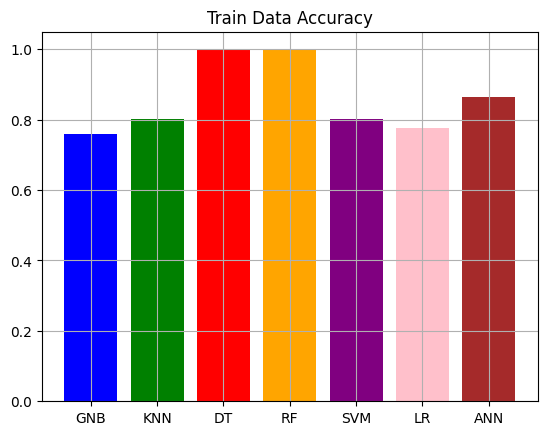

In [13]:
# Plot train data accuracy for models

acc_train = [acc_train_GNB, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['blue', 'green', 'red', 'orange', 'purple', 'pink', 'brown']
plt.title('Train Data Accuracy')
plt.bar(title, acc_train, color=colors)
plt.grid()

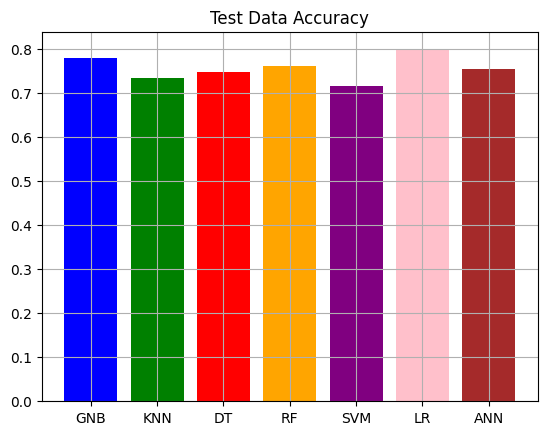

In [14]:
# Plot test data accuracy for models

acc_test = [acc_test_GNB, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['blue', 'green', 'red', 'orange', 'purple', 'pink', 'brown']
plt.title('Test Data Accuracy')
plt.bar(title, acc_test, color=colors)
plt.grid()

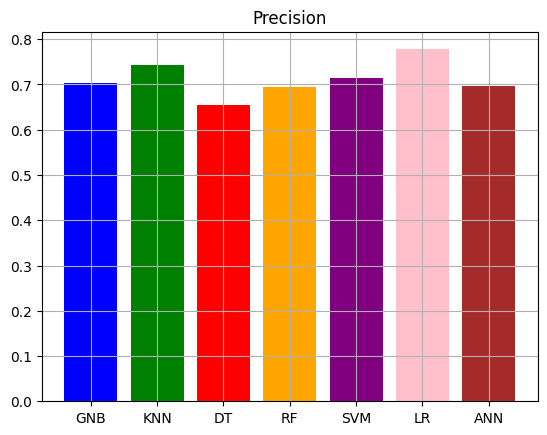

In [15]:
# Plot precission for models

p_test = [p_GNB, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['blue', 'green', 'red', 'orange', 'purple', 'pink', 'brown']
plt.title('Precision')
plt.bar(title, p_test, color=colors)
plt.grid()

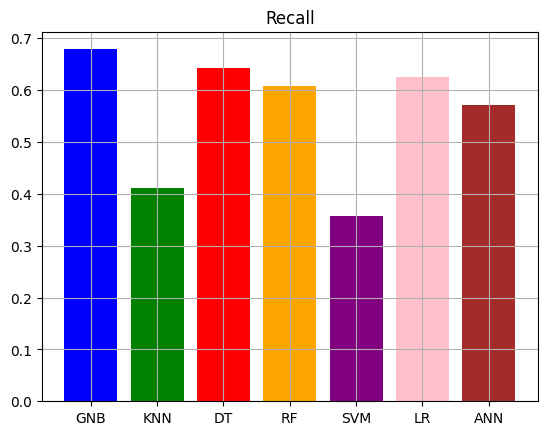

In [16]:
# Plot recall for models

r_test = [r_GNB, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['blue', 'green', 'red', 'orange', 'purple', 'pink', 'brown']
plt.title('Recall')
plt.bar(title, r_test, color=colors)
plt.grid()